# Predicting the Parkinson's Disease using Machine Learning

# Importing all the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# # to make the plot appear inside the notebook
# %matplotlib inline 

In [2]:
df = pd.read_csv("Parkinsson_disease.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
df = df.drop(columns=['name'])

In [6]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.shape

(195, 23)

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

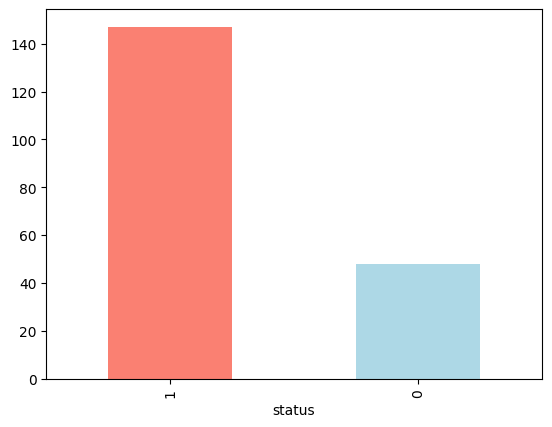

In [11]:
df["status"].value_counts().plot(kind="bar",color=("salmon","lightblue"));

In [12]:
pd.crosstab(df['status'], df['MDVP:Fo(Hz)'])

MDVP:Fo(Hz),88.333,91.904,95.056,95.385,95.605,95.730,96.106,98.804,100.770,100.960,...,237.226,237.323,240.301,241.404,242.852,243.439,244.990,245.510,252.455,260.105
status,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
pd.crosstab(df['status'], df['MDVP:Fhi(Hz)'])

MDVP:Fhi(Hz),102.145,102.305,107.715,108.664,110.019,112.240,112.777,113.597,113.840,115.697,...,442.557,442.824,450.247,479.697,492.892,565.740,581.289,586.567,588.518,592.030
status,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,0


In [14]:
pd.crosstab(df['status'], df['MDVP:Jitter(%)'])

MDVP:Jitter(%),0.00168,0.00174,0.00178,0.00180,0.00183,0.00185,0.00198,0.00205,0.00210,0.00212,...,0.01568,0.01627,0.01719,0.01813,0.01872,0.01936,0.02714,0.03011,0.03107,0.03316
status,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


# scatter plot

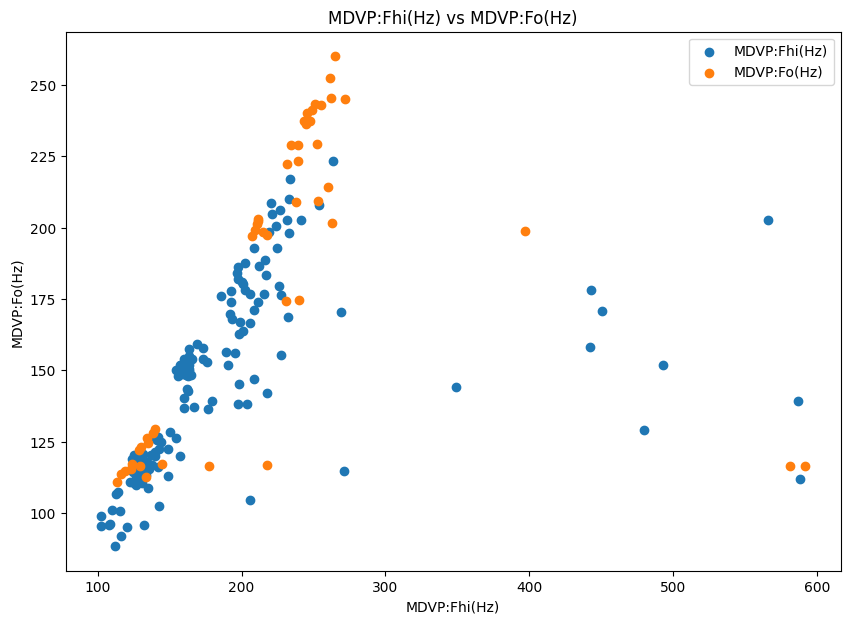

In [15]:
plt.figure(figsize=(10,7))

# Scatter with positive examples
plt.scatter(df["MDVP:Fhi(Hz)"][df.status==1],
            df['MDVP:Fo(Hz)'][df.status==1])

plt.scatter(df["MDVP:Fhi(Hz)"][df.status==0],
            df['MDVP:Fo(Hz)'][df.status==0])

plt.title("MDVP:Fhi(Hz) vs MDVP:Fo(Hz)")
plt.xlabel("MDVP:Fhi(Hz)")
plt.ylabel("MDVP:Fo(Hz)")
plt.legend(['MDVP:Fhi(Hz)','MDVP:Fo(Hz)']);

# Plotting the correlation metrix

In [16]:
df["status"] = df["status"].astype('float64')

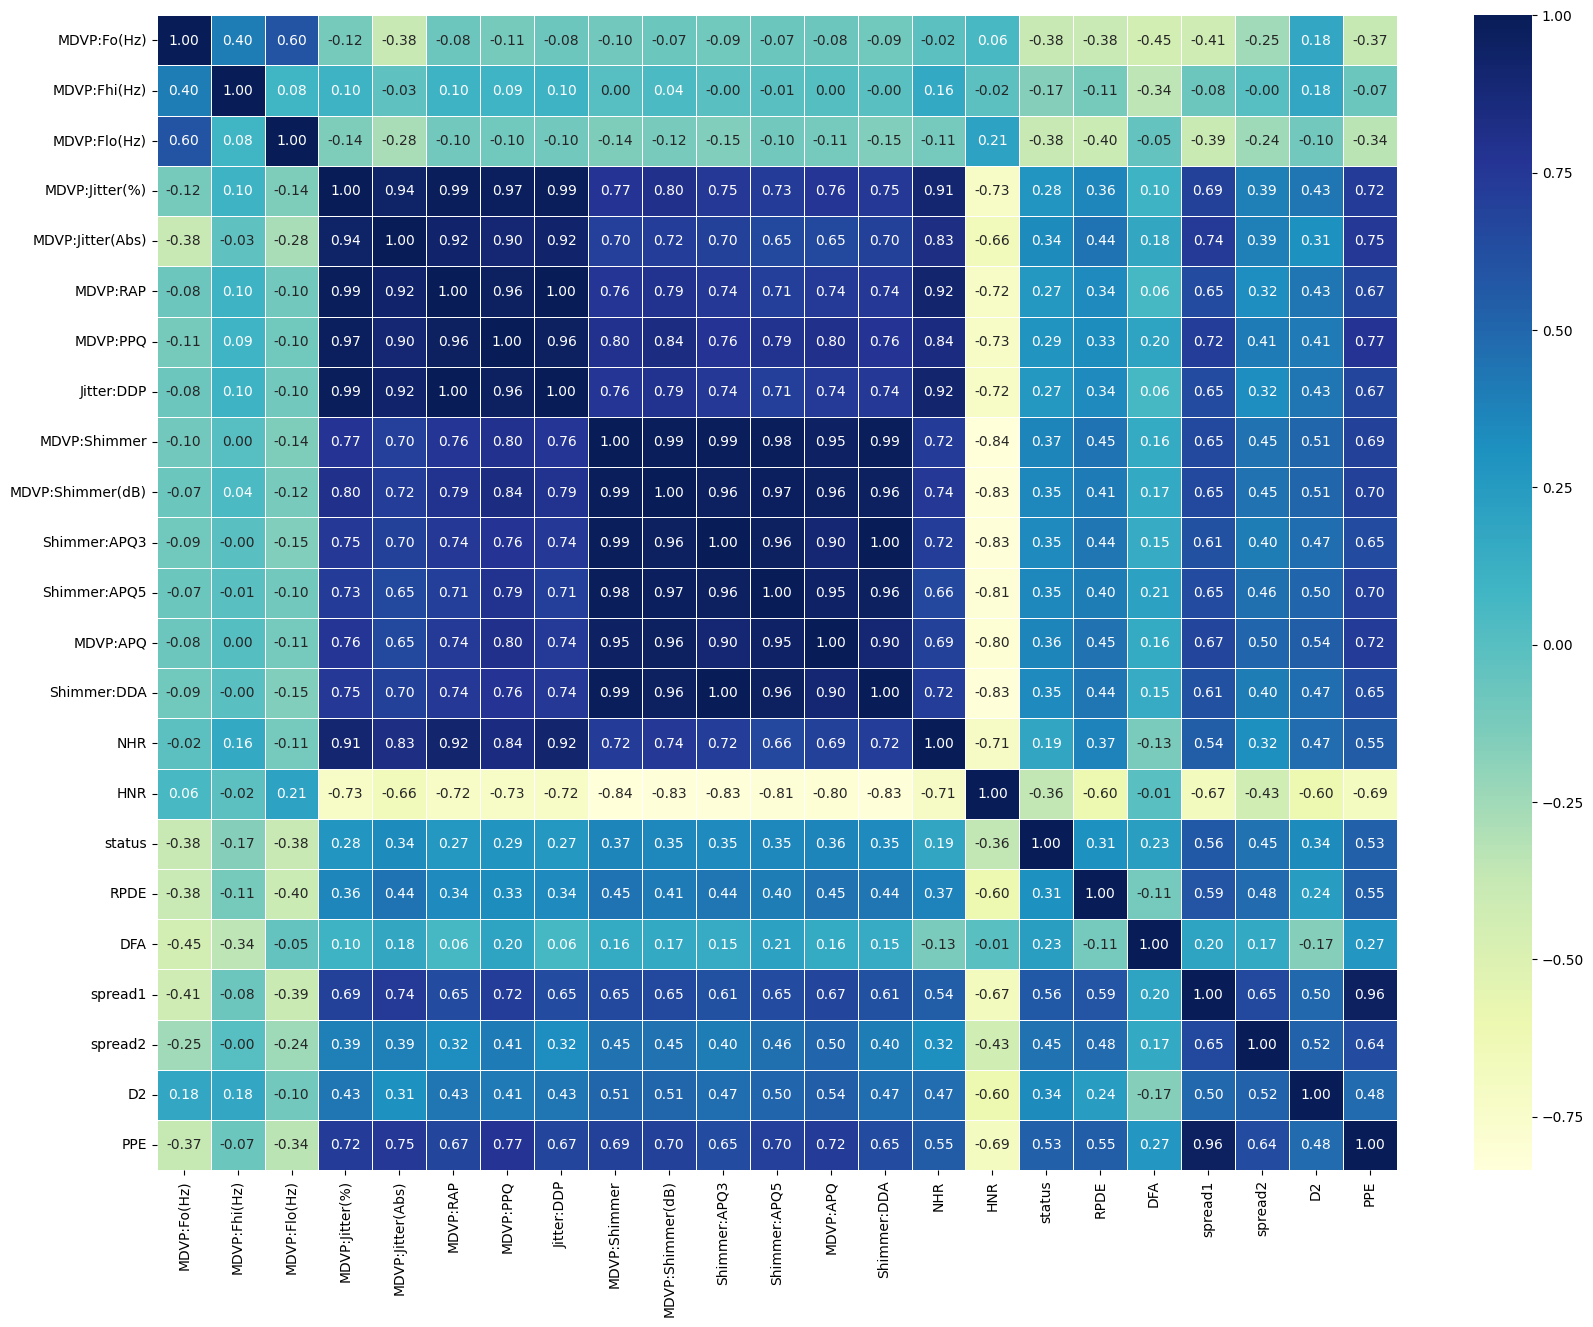

In [17]:
# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_metrix = numerical_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_metrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.show()

In [18]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Creating a Machine Learning Model

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make plots appear inside the notebook
%matplotlib inline 

#import models form sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

In [20]:
np.random.seed(42)

In [21]:
x = df.drop("status",axis = 1)
y = df["status"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [23]:
x_train.shape

(156, 22)

In [24]:
x_test.shape

(39, 22)

In [25]:
y_train.shape

(156,)

In [26]:
y_test.shape

(39,)

In [27]:
!pip install xgboost

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor


In [29]:
models = {"Logistic Regression" : LogisticRegression(),
         "K Neighbours" : KNeighborsClassifier(),
         "Random Forest Classifier" : RandomForestClassifier(),
         "Support Vector Machines" : SVC(),
         "AdaBoost Classifier" : AdaBoostClassifier()}

### Creating a function to fit the model

In [30]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    # Make a dictionary to store the model scores
    model_scores={}
    # 
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and store it to the model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [31]:
model_score = fit_and_score(models,
                           x_train,
                           x_test,
                           y_train,
                           y_test)

model_score

/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Logistic Regression': 0.8974358974358975,
 'K Neighbours': 0.8205128205128205,
 'Random Forest Classifier': 0.9487179487179487,
 'Support Vector Machines': 0.8461538461538461,
 'AdaBoost Classifier': 0.8717948717948718}

In [32]:
import matplotlib.pyplot as plt

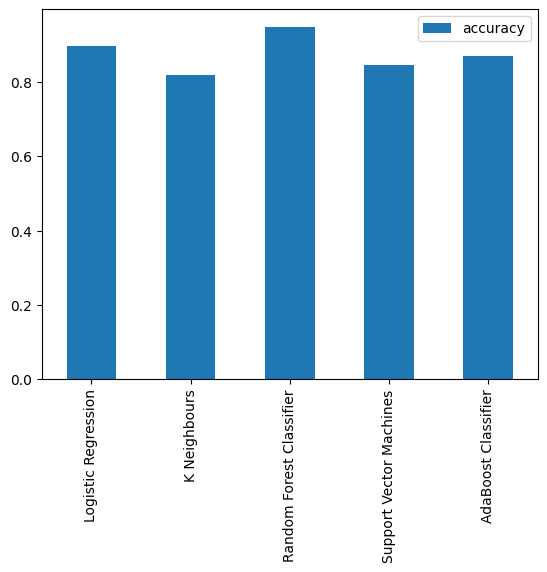

In [33]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

#### Let's tune Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
# Initialize lists to store scores
train_scores = []
test_scores = []

# Create a list of different values of regularisation parameter C
C_values = [0.01, 0.1, 1, 10, 100]

# Set up LogisticRegression instance
log_reg = LogisticRegression()

# Loop through different C values
for C in C_values:
    log_reg.set_params(C=C)
    
    # Fit the algorithm on the training data
    log_reg.fit(x_train, y_train)
    
    # Update the training score list
    train_scores.append(log_reg.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(log_reg.score(x_test, y_test))

/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [35]:
train_scores

[0.8333333333333334,
 0.8333333333333334,
 0.8525641025641025,
 0.8589743589743589,
 0.8589743589743589]

In [36]:
test_scores

[0.7948717948717948,
 0.8717948717948718,
 0.8974358974358975,
 0.8974358974358975,
 0.9230769230769231]

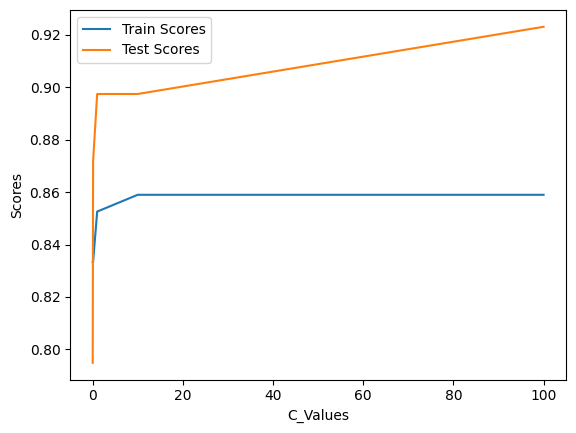

In [37]:
plt.plot(C_values, train_scores, label="Train Scores")
plt.plot(C_values, test_scores, label="Test Scores")
plt.ylabel("Scores")
plt.xlabel("C_Values")
plt.legend()
plt.show();

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store scores
train_scores_knn = []
test_scores_knn = []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Set up KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors values
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm on the training data
    knn.fit(x_train, y_train)
    
    # Update the training score list
    train_scores_knn.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores_knn.append(knn.score(x_test, y_test))

In [39]:
train_scores_knn

[1.0,
 0.9294871794871795,
 0.9294871794871795,
 0.8910256410256411,
 0.8974358974358975,
 0.8782051282051282,
 0.8974358974358975,
 0.8974358974358975,
 0.8846153846153846,
 0.8910256410256411,
 0.8846153846153846,
 0.8846153846153846,
 0.8269230769230769,
 0.8333333333333334,
 0.8269230769230769,
 0.8333333333333334,
 0.8076923076923077,
 0.7948717948717948,
 0.7948717948717948,
 0.7948717948717948]

In [40]:
test_scores_knn

[0.7948717948717948,
 0.7435897435897436,
 0.7948717948717948,
 0.7692307692307693,
 0.8205128205128205,
 0.7435897435897436,
 0.8205128205128205,
 0.7948717948717948,
 0.7948717948717948,
 0.7948717948717948,
 0.7692307692307693,
 0.7692307692307693,
 0.7948717948717948,
 0.7948717948717948,
 0.8205128205128205,
 0.7692307692307693,
 0.8205128205128205,
 0.7435897435897436,
 0.7692307692307693,
 0.717948717948718]

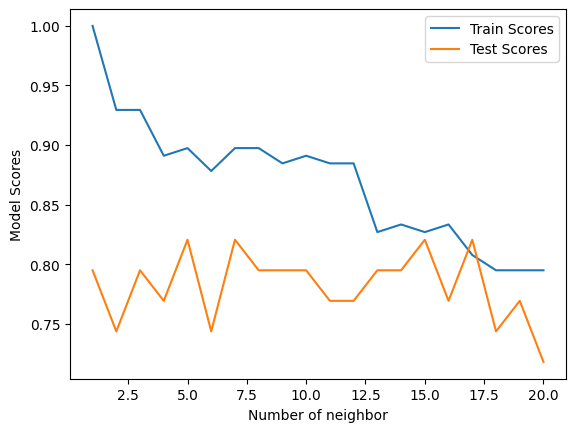

In [41]:
plt.plot(neighbors,train_scores_knn, label="Train Scores");
plt.plot(neighbors,test_scores_knn,label=("Test Scores"));
plt.xlabel("Number of neighbor");
plt.ylabel("Model Scores");
plt.legend();
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize lists to store scores
train_scores_rf = []
test_scores_rf = []

# Create a list of different values of n_estimators
n_estimators_range = range(1, 21)

# Set up RandomForestClassifier instance
rf = RandomForestClassifier()

# Loop through different n_estimators values
for n in n_estimators_range:
    rf.set_params(n_estimators=n)
    
    # Fit the algorithm on the training data
    rf.fit(x_train, y_train)
    
    # Update the training score list
    train_scores_rf.append(rf.score(x_train, y_train))
    
    # Update the test scores list
    test_scores_rf.append(rf.score(x_test, y_test))

In [43]:
train_scores_rf

[0.9102564102564102,
 0.9358974358974359,
 0.9807692307692307,
 0.9743589743589743,
 0.9807692307692307,
 1.0,
 0.9871794871794872,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9935897435897436,
 0.9935897435897436,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9935897435897436]

In [44]:
test_scores_rf

[0.8717948717948718,
 0.8205128205128205,
 0.8717948717948718,
 0.7948717948717948,
 0.9230769230769231,
 0.8205128205128205,
 0.9230769230769231,
 0.8717948717948718,
 0.9230769230769231,
 0.9230769230769231,
 0.9487179487179487,
 0.8974358974358975,
 0.9487179487179487,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9487179487179487,
 0.8974358974358975,
 0.9487179487179487,
 0.8974358974358975]

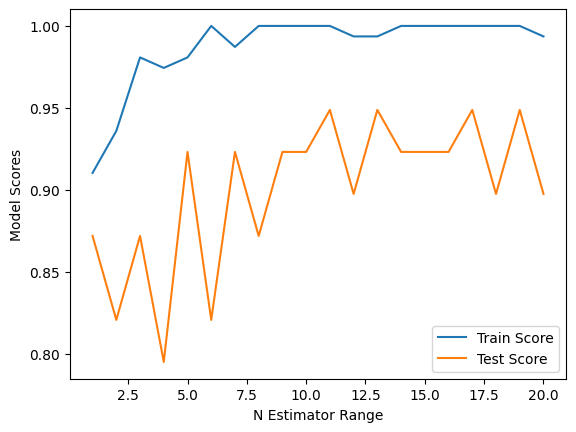

In [45]:
plt.plot(n_estimators_range, train_scores_rf, label="Train Score")
plt.plot(n_estimators_range, test_scores_rf, label="Test Score")
plt.xlabel("N Estimator Range")
plt.ylabel("Model Scores")
plt.legend()
plt.show();

### Hyperparameter training the RandomForest Model

In [46]:
# Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [47]:
# Set up random seed
np.random.seed(42)

# set up Random Hyperparameter for the RandomForestClassifier

rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=50,
                            verbose=True)

In [48]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
rf_grid.score(x_test,y_test)

0.9487179487179487

In [50]:
rf_grid.score(x_train,y_train)

0.9871794871794872

In [51]:
rf_grid.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [52]:
# Creating a hyperparameter grid for RandomForestClassifier
rf_grid_1 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# Set up random seed
np.random.seed(42)

# set up Random Hyperparameter for the RandomForestClassifier

rf_grid_1 = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid_1,
                               cv=5,
                               n_iter=60,
                               verbose=True)

In [53]:
rf_grid_1.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=60,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [54]:
rf_grid_1.score(x_test,y_test)

0.9487179487179487

In [55]:
rf_grid_1.score(x_train, y_train)

0.9935897435897436

In [56]:
rf_grid = GridSearchCV(RandomForestClassifier(),
                      param_grid=rf_grid_1,
                      cv=5,
                      verbose=True)

### Using Grid Search CV

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [57]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
}

In [58]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=5,                # Number of cross-validation folds
                           verbose= 2,        # Verbosity level 
                           n_jobs=-1
)

In [59]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=260; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=310; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=410; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=460; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=560; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=660; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=710; total time=   1.3s
[CV] END

KeyboardInterrupt: 

In [ ]:
grid_search.score(x_test,y_test)

In [71]:
grid_search.score(x_train,y_train)

1.0

In [72]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}

In [73]:
grid_search.best_score_

0.929233870967742

In [79]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=60)

In [81]:
import joblib

In [82]:
# Save the best model and grid search results
joblib.dump(grid_search.best_estimator_, 'best_model.joblib')
joblib.dump(grid_search, 'grid_search_results.joblib')

['grid_search_results.joblib']

In [83]:
# Load the saved Grid Search CV results and model
grid_search = joblib.load('grid_search_results.joblib')
best_model = joblib.load('best_model.joblib')